# Analisis Exploratorio y Visualizacion (tips dataset)

In [35]:
#Partiendo del concepto de hacer el analisis exploratorio, 
#en Tableau/PowerBi se puede hacer el analisis pero falta motor estadistico

In [36]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib inline

## Cargar el data set

In [37]:
xlsTips = 'tips.xlsx'
dfTips = pd.read_excel(xlsTips)

In [38]:
dfTips.shape

(244, 7)

In [39]:
dfTips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB


In [40]:
dfTips.index

RangeIndex(start=0, stop=244, step=1)

In [41]:
dfTips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [42]:
dfTips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [43]:
dfTips.get_dtype_counts()

float64    2
int64      1
object     4
dtype: int64

In [44]:
dfTips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [45]:
dfTips.head(n=2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [46]:
dfTips.tail(n=2)

,total_bill,tip,sex,smoker,day,time,size
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [47]:
dfTips.iloc[2,1]

3.5

In [48]:
dfTips.loc[2,'sex']

'Male'

In [49]:
dfTips.iloc[0]

total_bill     16.99
tip             1.01
sex           Female
smoker            No
day              Sun
time          Dinner
size               2
Name: 0, dtype: object

In [50]:
dfTips.iloc[-1]

total_bill     18.78
tip             3.00
sex           Female
smoker            No
day             Thur
time          Dinner
size               2
Name: 243, dtype: object

In [51]:
dfTips.groupby('sex')['tip'].sum()/dfTips.groupby('sex')['total_bill'].sum()
#Agrupar por categoria de sexo el promedio de propina por genero

sex
Female   0.16
Male     0.15
dtype: float64

In [52]:
dfTips.iloc[[0,49,99]]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
49,18.04,3.00,Male,No,Sun,Dinner,2
99,12.46,1.50,Male,No,Fri,Dinner,2


In [53]:
dfTips.describe()

,total_bill,tip,size
count,244.00,244.00,244.00
mean,19.79,3.00,2.57
std,8.90,1.38,0.95
min,3.07,1.00,1.00
25%,13.35,2.00,2.00
50%,17.80,2.90,2.00
75%,24.13,3.56,3.00
max,50.81,10.00,6.00


In [54]:
print(dfTips['day'].unique())
print(dfTips['time'].unique())
print(dfTips['sex'].unique())

['Sun' 'Sat' 'Thur' 'Fri']
['Dinner' 'Lunch']
['Female' 'Male']


In [55]:
dfTips[['time','day','sex','size']].head(3)

,time,day,sex,size
0,Dinner,Sun,Female,2
1,Dinner,Sun,Male,3
2,Dinner,Sun,Male,3


In [56]:
dfTipsFemales = dfTips.query('sex == "Female"')
dfTipsMales = dfTips.query('sex == "Male"')
pd.concat([dfTipsFemales.head().reset_index(), dfTipsMales.head().reset_index()], 
        axis = 1, keys = ['Female','Male'])

Female                                                   Male             \
   index total_bill  tip     sex smoker  day    time size index total_bill   
0      0      16.99 1.01  Female     No  Sun  Dinner    2     1      10.34   
1      4      24.59 3.61  Female     No  Sun  Dinner    4     2      21.01   
2     11      35.26 5.00  Female     No  Sun  Dinner    4     3      23.68   
3     14      14.83 3.02  Female     No  Sun  Dinner    2     5      25.29   
4     16      10.33 1.67  Female     No  Sun  Dinner    3     6       8.77   

                                       
   tip   sex smoker  day    time size  
0 1.66  Male     No  Sun  Dinner    3  
1 3.50  Male     No  Sun  Dinner    3  
2 3.31  Male     No  Sun  Dinner    2  
3 4.71  Male     No  Sun  Dinner    4  
4 2.00  Male     No  Sun  Dinner    2

In [57]:
pd.options.display.float_format = '{:,.2f}'.format
pd.concat([dfTipsFemales.describe(), dfTipsMales.describe()], 
        axis = 1, keys = ['Female','Male'])

Female                   Male              
      total_bill   tip  size total_bill    tip   size
count      87.00 87.00 87.00     157.00 157.00 157.00
mean       18.06  2.83  2.46      20.74   3.09   2.63
std         8.01  1.16  0.94       9.25   1.49   0.96
min         3.07  1.00  1.00       7.25   1.00   1.00
25%        12.75  2.00  2.00      14.00   2.00   2.00
50%        16.40  2.75  2.00      18.35   3.00   2.00
75%        21.52  3.50  3.00      24.71   3.76   3.00
max        44.30  6.50  6.00      50.81  10.00   6.00

## Analisis de una Variable

### Visualizacion de una dimension

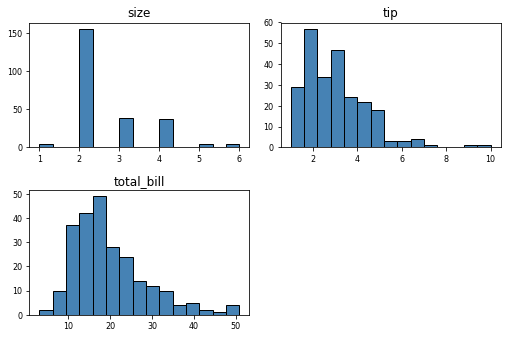

In [58]:
dfTips.hist(bins=15, color='steelblue', 
            edgecolor='black', 
            linewidth=1.0, 
            xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0,0,1.2,1.2))

/Users/raulmartinez/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/raulmartinez/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/raulmartinez/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


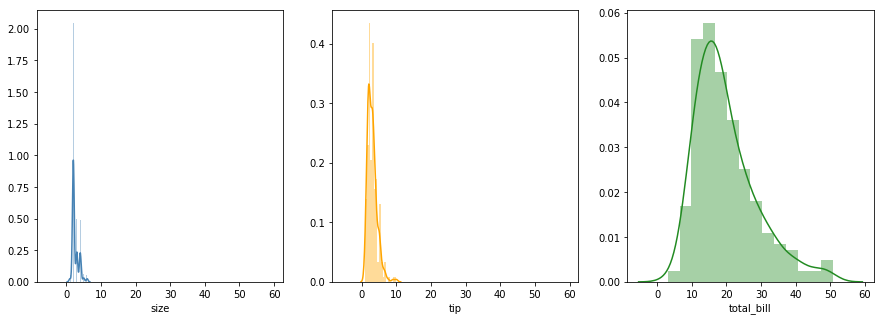

In [59]:
f, axes = plt.subplots(1,3, figsize=(15,5), sharex=True)
sns.distplot(dfTips['size'],color='steelblue', ax=axes[0])
sns.distplot(dfTips['tip'],color='orange', ax=axes[1])
sns.distplot(dfTips['total_bill'],color='forestgreen', ax=axes[2])

In [60]:
dfTips['tip_perc']=100*dfTips['tip']/dfTips['total_bill']
dfTips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'tip_perc'],
      dtype='object')

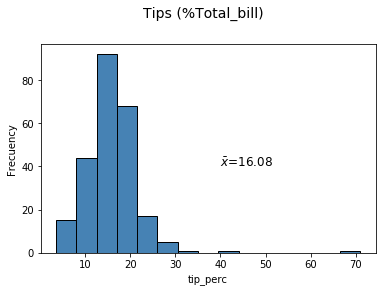

In [61]:
fig = plt.figure(figsize=(6,4))
title = fig.suptitle("Tips (%Total_bill)", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax=fig.add_subplot(1,1,1)
ax.set_xlabel("tip_perc")
ax.set_ylabel("Frecuency")
ax.text(40,40, r'$\bar{x}$='+str(round(dfTips['tip_perc'].mean(),2)),
        fontsize=12)
freq, bins , patches = ax.hist(dfTips['tip_perc'],
                               color='steelblue',
                               bins=15, edgecolor='black',
                               linewidth=1)

In [62]:
fig = plt.figure(figsize=(6,4))
title = fig.suptitle("Tips (%Total_bill)", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax=fig.add_subplot(1,1,1)
ax.set_xlabel("tip_perc")
ax.set_ylabel("Frecuency")
sns.text(dfTips['tip_perc'] 

SyntaxError: unexpected EOF while parsing (<ipython-input-62-a2d54e23dd47>, line 7)

## Categorias

In [63]:
pd.DataFrame(dfTips.sex.value_counts())

,sex
Male,157
Female,87


In [64]:
pd.DataFrame(dfTips.sex.value_counts(normalize=True))

,sex
Male,0.64
Female,0.36


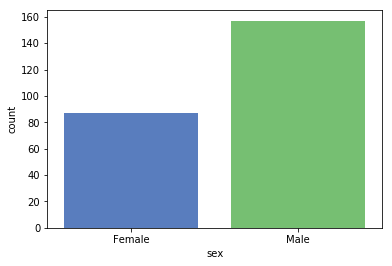

In [65]:
sns.countplot(x='sex',data=dfTips, palette='muted')

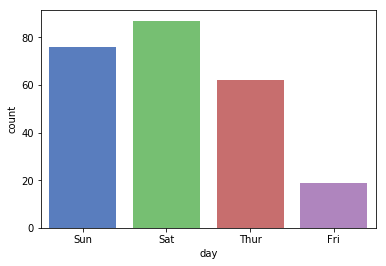

In [66]:
sns.countplot(x='day',data=dfTips, palette='muted')

In [ ]:
from scipy.stats import ttest_ind
dfTipsFemale = dfTips.query('sex==c"Female"')
dfTipsMale = dfTips.query('sex== "Male"')

ttest_ind(dfTipsFemale['tip_perc'], dfTipsMales['tip_perc'])

## Analisis Multivariable


### correlaciones

In [ ]:
dfTips.corr()

Text(0.5,0.98,'Tips Variables Correlation Heatmap')

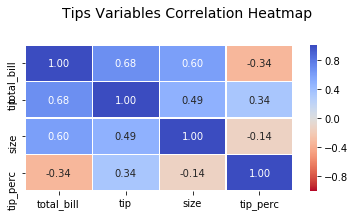

In [70]:
f, ax = plt.subplots(figsize=(6,3))
corr = dfTips.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm_r", fmt= '.2f', 
                 linewidths=0.05, vmin=-1, vmax=1)
f.subplots_adjust(top=0.8)
f.suptitle("Tips Variables Correlation Heatmap", fontsize=14)


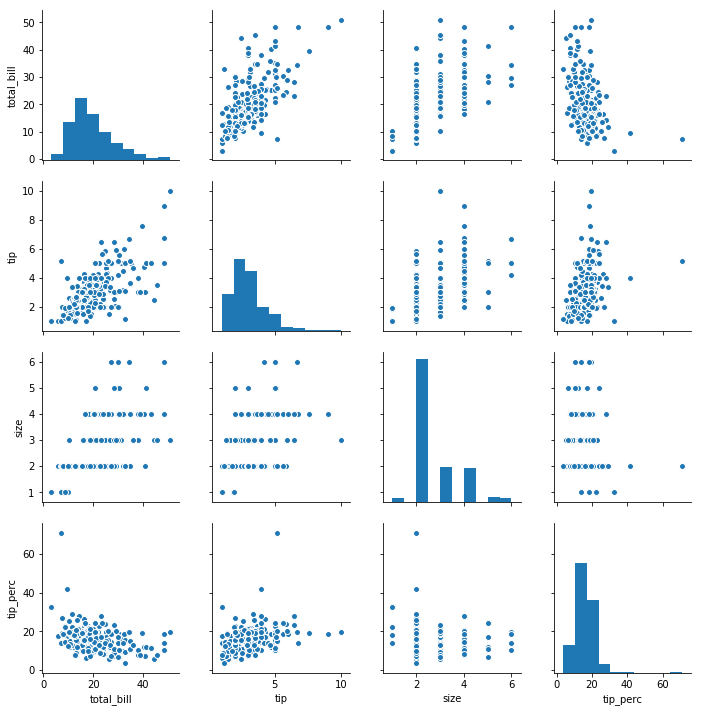

In [74]:
sns.pairplot(dfTips)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
tip_perc      244 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 15.3+ KB


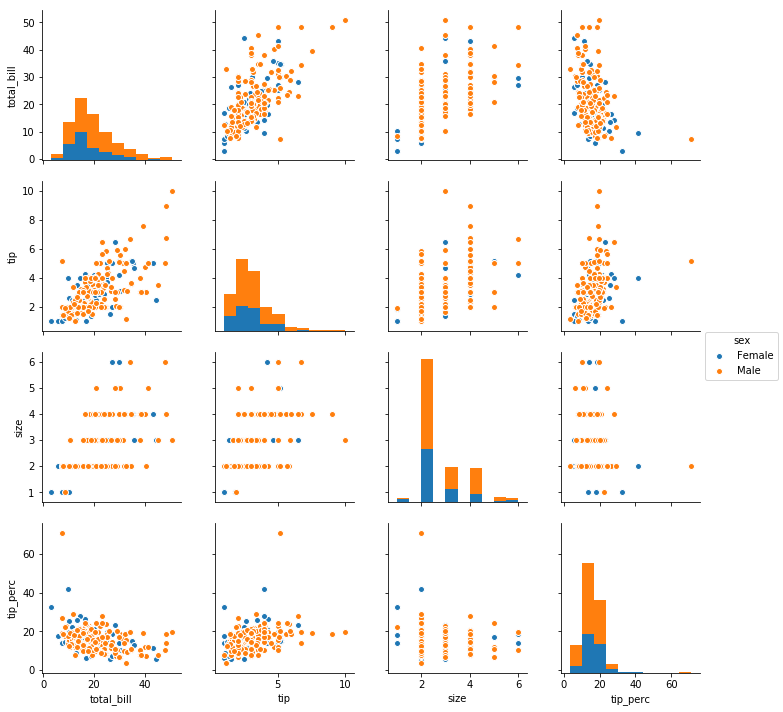

In [76]:
dfTips.info()
sns.pairplot(dfTips, hue='sex')

In [78]:
sns.__version__

'0.8.1'

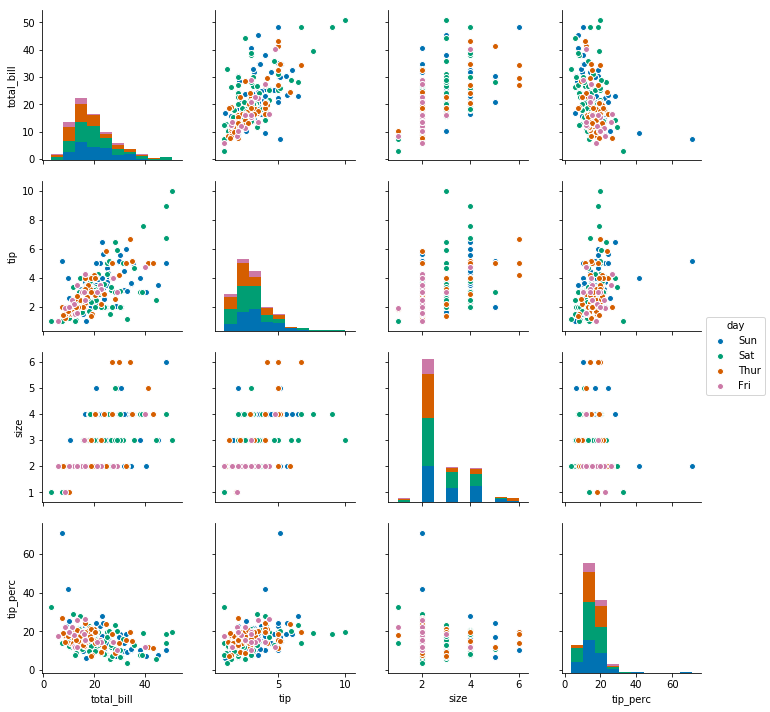

In [79]:
sns.pairplot(dfTips, hue='day', palette='colorblind') #deep, muted, pastel, bright, dark


## Coordenadas paralelas

In [88]:
import sklearn.preprocessing as pp
cols = ['size', 'tip', 'total_bill']
scaler = pp.StandardScaler()
scaled_dfTips = scaler.fit_transform(dfTips[cols])
scaled_dfTips = pd.DataFrame(scaled_dfTips, columns = cols)
final_dfTip = pd.concat([scaled_dfTips, dfTips['sex']], axis=1)
final_dfTip.head()

,size,tip,total_bill,sex
0,-0.60,-1.44,-0.31,Female
1,0.45,-0.97,-1.06,Male
2,0.45,0.36,0.14,Male
3,-0.60,0.23,0.44,Male
4,1.51,0.44,0.54,Female


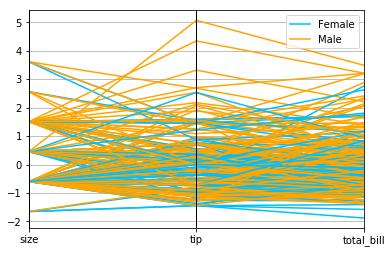

In [91]:
from pandas.plotting import parallel_coordinates
pc = parallel_coordinates(final_dfTip, 'sex', color=('deepskyblue', 'orange'))

### Dos Variables cuantitativas (grafico de dispersion)

/Users/raulmartinez/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/raulmartinez/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


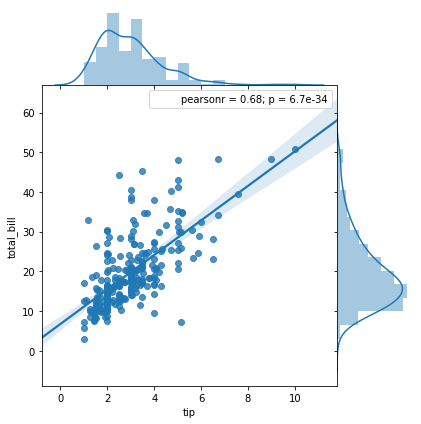

In [93]:
sns.jointplot(x='tip', y='total_bill', data=dfTips, kind='reg', space=0, ratio=4)

## Variables cuantitativas y categoricas

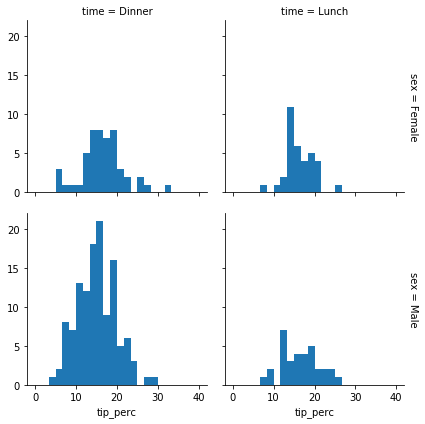

In [98]:
grid = sns.FacetGrid(dfTips, row='sex', col='time', margin_titles=True)
grid.map(plt.hist, "tip_perc", bins=np.linspace(0,40,25));

## Boxplots

In [99]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("day", "tip_perc", data=dfTips, kind='sex')
    g.set_axis_labels("Day", "Tips (%)")

AttributeError: module 'seaborn' has no attribute 'catplot'

In [102]:
from scipy.stats import ttest_ind
dfTipsFemaleFri = dfTips.query('sex == "Female"').query('day == "Fri"')
dfTipsMaleFri = dfTips.query('sex == "Male"').query('day == "Fri"')
ttest_ind(dfTipsFemaleFri['tip_perc'], dfTipsMaleFri['tip_perc'])

Ttest_indResult(statistic=3.114352270662731, pvalue=0.0063074821318122075)

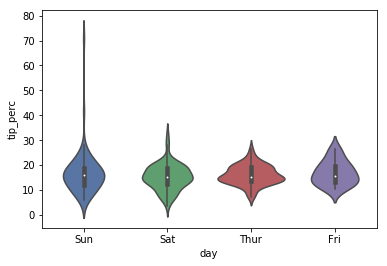

In [103]:
sns.violinplot(x= 'day', y='tip_perc', data=dfTips, palette='deep')

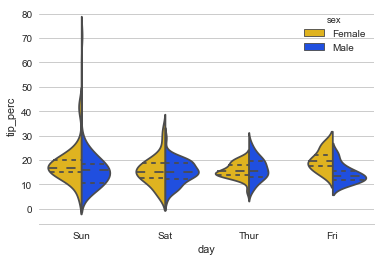

In [107]:
sns.set(style='whitegrid', palette='bright', color_codes=True)
sns.violinplot(x='day', y='tip_perc', hue='sex', split=True, inner='quart', 
               palette={"Male":"b", "Female":"y"}, data=dfTips)
sns.despine(left = True)